In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

mrot = 22440

# Light

Light

Обратите внимание, что в базе помимо адекватных ответов есть различные “выбросы” типа: возраст 0 или 120 лет, желаемая зарплата 1 рубль и т.д. Проанализируйте базу на такие выбросы и проведите исследования, схожие с ноутбуком занятия с учетом выбросов. Насколько масштабными окажутся изменения?
На занятии не рассматривалась статистика людей, которые могли не указать пол. Проанализируйте, какие поля наиболее часто встречаются у таких лиц, какая средняя зарплата и другие показатели?
Возьмите сырую базу и посмотрите сколько в среднем запрашивают разработчики Java, Python, C++


In [8]:
fixed_df = pd.read_csv('/content/drive/MyDrive/Assets/lab3/hh_parsed.csv')



parameters = ['М', 'Ж', 'Не указан']
pol_unusual = fixed_df[~fixed_df['Пол'].isin(parameters)].shape[0]

print(f"Количество необычных значений в столбце Пол: {pol_unusual}")

age_unusual = fixed_df[(fixed_df['Возраст'] < 14) | (fixed_df['Возраст'] > 90)]
print(f"Количество необычных значений в столбце Возраст: {age_unusual.shape[0]}")
print("Разновидности необычных значений Возраста:", age_unusual['Возраст'].unique())

salary_unusual = fixed_df[fixed_df['ЗП'] <= mrot]

print(f"Количество необычных значений в столбце ЗП: {salary_unusual.shape[0]}")
print("Разновидности необычных значений ЗП:", np.sort(salary_unusual['ЗП'].astype(int).unique())[::-1])

city = [ 'Москва','малый или за пределами России город', 'Сочи', 'Казань', 'Санкт-Петербург',
 'Волгоград', 'Екатеринбург', 'Нижний Новгород', 'Воронеж', 'Уфа', 'Самара',
 'Ростов-на-Дону', 'Пермь', 'Омск', 'Новосибирск', 'Красноярск', 'Челябинск']

city_unusual = fixed_df[~fixed_df['Город'].isin(city)]

print(f"Количество необычных значений в столбце Город: {city_unusual.shape[0]}")

busyness = [ 'полная занятость', 'частичная занятость ', 'проектная работа ','стажировка ',
    'Не указано','стажировка проектная работа ','стажировка частичная занятость ',
    'стажировка частичная занятость проектная работа ','проектная работа полная занятость',
    'частичная занятость полная занятость', 'частичная занятость проектная работа полная занятость',
    'стажировка частичная занятость полная занятость', 'стажировка полная занятость',
    'стажировка частичная занятость проектная работа полная занятость',
    'частичная занятость проектная работа ', 'стажировка проектная работа полная занятость']

busyness_unusual = fixed_df[~fixed_df['Занятость'].isin(busyness)]

print(f"Количество необычных значений в столбце Занятость: {busyness_unusual.shape[0]}")

chart = [ 'полный день ', 'гибкий график ', 'Не указано', 'сменный график ',
          'удаленная работа','гибкий график полный день ','полный день удаленная работа',
          'гибкий график полный день удаленная работа', 'полный день сменный график ',
          'гибкий график удаленная работа', 'гибкий график полный день сменный график удаленная работа',
          'гибкий график полный день сменный график ', 'гибкий график сменный график удаленная работа',
          'полный день сменный график удаленная работа', 'гибкий график сменный график ',
          'сменный график удаленная работа']

chart_unusual = fixed_df[~fixed_df['График'].isin(chart)]

print(f"Количество необычных значений в столбце График: {chart_unusual.shape[0]}")

experience_unusual = fixed_df[ fixed_df['Опыт (двойное нажатие для полной версии)'] > 900]

print(f"Количество необычных значений в столбце Опыт: {experience_unusual.shape[0]}")
print("Разновидности необычных значений Опыта:", experience_unusual['Опыт (двойное нажатие для полной версии)'].dropna().unique())

chart = [ 'среднее специальное ', 'высшее ', 'среднее образование', 'Не указано']

chart_unusual = fixed_df[~fixed_df['Образование и ВУЗ'].isin(chart)]

print(f"Количество необычных значений в столбце Образование и ВУЗ: {chart_unusual.shape[0]}")
print("Разновидности необычных значений Образования и ВУЗ:", chart_unusual['Образование и ВУЗ'].dropna().unique())


Количество необычных значений в столбце Пол: 0
Количество необычных значений в столбце Возраст: 2328
Разновидности необычных значений Возраста: [  0 120  92 101]
Количество необычных значений в столбце ЗП: 4469
Разновидности необычных значений ЗП: [22425 22100 22000 21930 21900 21250 21000 20800 20501 20400 20000 19380
 19000 18900 18750 18700 18500 18000 17500 17000 16900 16800 16150 16000
 15600 15300 15200 15000 14999 14900 14525 14450 14000 13600 13000 12750
 12000 11900 11250 11163 11050 11000 10400 10200 10000  9999  9800  9375
  9100  9000  8500  8000  7777  7650  7500  7425  7000  6800  6000  5905
  5500  5300  5280  5000  4990  4700  4500  4200  4000  3800  3750  3700
  3500  3400  3300  3000  2800  2750  2700  2650  2600  2500  2200  2100
  2048  2000  1950  1900  1875  1800  1700  1650  1600  1500  1450  1400
  1300  1200  1190  1111  1100  1050  1000   999   950   900   888   850
   800   777   750   700   680   666   650   600   550   525   500   450
   420   400   300   2

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Анализ базы на взаимосвязь между столбцами ЗП и Возраст с всеми знаечниями и без выбросов:

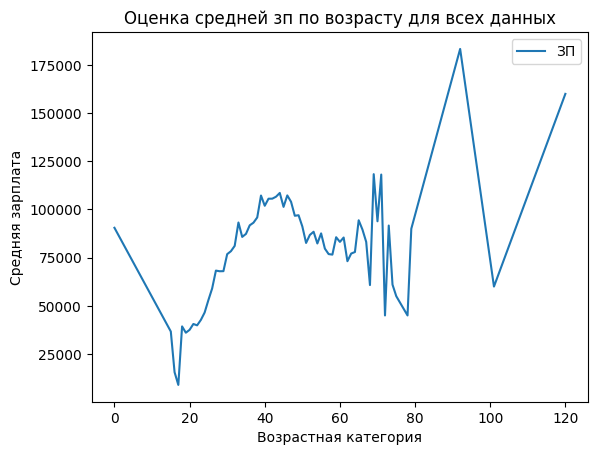

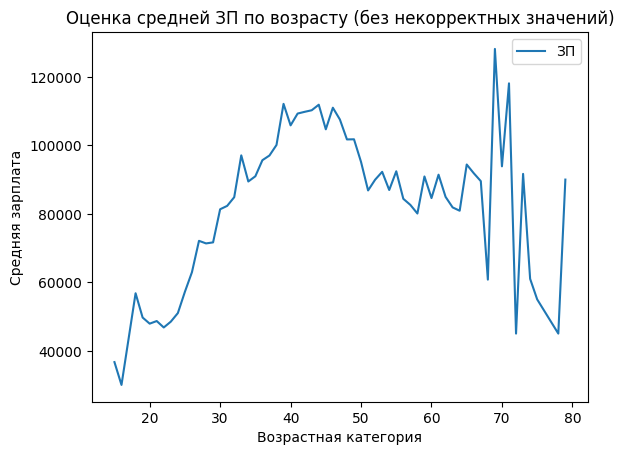

In [10]:
fixed_df.groupby('Возраст')['ЗП'].mean().plot()
plt.xlabel('Возрастная категория')
plt.ylabel('Средняя зарплата')
plt.title('Оценка средней зп по возрасту для всех данных')
plt.legend()
plt.show()

df_clean = fixed_df[(fixed_df['Возраст'] >= 14) & (fixed_df['Возраст'] <= 80)]
df_clean = df_clean[df_clean['ЗП'] > mrot]
df_clean.groupby('Возраст')['ЗП'].mean().plot()
plt.xlabel('Возрастная категория')
plt.ylabel('Средняя зарплата')
plt.title('Оценка средней ЗП по возрасту (без некорректных значений)')
plt.legend()
plt.show()

Анализ базы на взаимосвязь между столбцами Опыт и ЗП с всеми знаечниями и без выбросов:

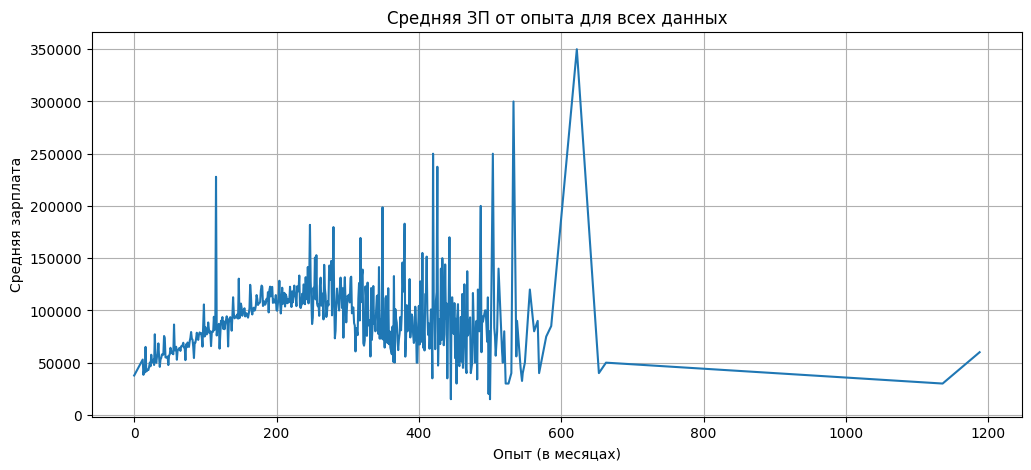

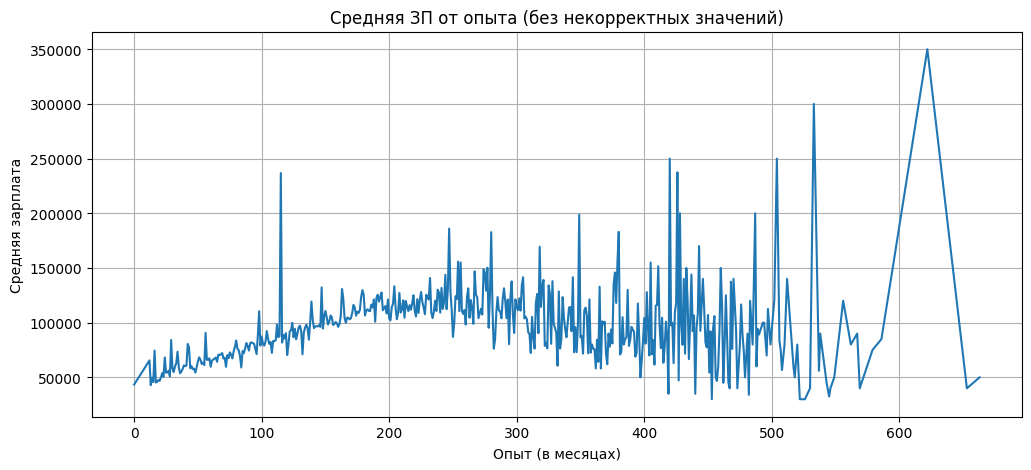

In [11]:
expert_all = (
    fixed_df.groupby('Опыт (двойное нажатие для полной версии)')['ЗП']
    .mean()
    .sort_index()
)

plt.figure(figsize=(12, 5))
plt.plot(expert_all.index, expert_all.values)
plt.title("Средняя ЗП от опыта для всех данных")
plt.xlabel("Опыт (в месяцах)")
plt.ylabel("Средняя зарплата")
plt.grid(True)
plt.show()

df_clean = fixed_df[
    (fixed_df['ЗП'] > mrot) &
    (fixed_df['Опыт (двойное нажатие для полной версии)'] <= 900)
]

expert_clean = (
    df_clean.groupby('Опыт (двойное нажатие для полной версии)')['ЗП']
    .mean()
    .sort_index()
)

plt.figure(figsize=(12, 5))
plt.plot(expert_clean.index, expert_clean.values)
plt.title("Средняя ЗП от опыта (без некорректных значений)")
plt.xlabel("Опыт (в месяцах)")
plt.ylabel("Средняя зарплата")
plt.grid(True)
plt.show()

2. На занятии не рассматривалась статистика людей, которые могли не указать пол. Проанализируйте, какие поля наиболее часто встречаются у таких лиц, какая средняя зарплата и другие показатели?

In [12]:
gender_unknown = fixed_df[fixed_df['Пол'] == 'Не указан']
print("Количество людей с неуказанным полом:", len(gender_unknown))

print("\nСамые частые значения для разных столбцов:")

print(gender_unknown['Возраст'].value_counts().head(5))
print(gender_unknown['Опыт (двойное нажатие для полной версии)'].value_counts().head(5))
print(gender_unknown['Образование и ВУЗ'].value_counts().head(5))
print(gender_unknown['Город'].value_counts().head(5))
print(gender_unknown['График'].value_counts().head(5))
print(gender_unknown['Занятость'].value_counts().head(5))

print("\nМаксимальная зарплата:", int(gender_unknown['ЗП'].max()))
print("Средняя зарплата:", int(gender_unknown['ЗП'].mean()))
print("Минимальная зарплата:", int(gender_unknown['ЗП'].min()))

Количество людей с неуказанным полом: 1766

Самые частые значения для разных столбцов:
Возраст
0     123
33    118
32    113
30    104
31     99
Name: count, dtype: int64
Опыт (двойное нажатие для полной версии)
154    18
153    17
130    16
80     16
132    16
Name: count, dtype: int64
Образование и ВУЗ
высшее                         1372
высшее среднее специальное      220
высшее неоконченное высшее      100
среднее специальное              43
среднее образование              21
Name: count, dtype: int64
Город
малый или за пределами России город    1766
Name: count, dtype: int64
График
полный день                                                  833
гибкий график полный день сменный график удаленная работа    303
гибкий график полный день удаленная работа                   247
полный день удаленная работа                                  98
гибкий график полный день                                     77
Name: count, dtype: int64
Занятость
полная занятость                            

3. Возьмите сырую базу и посмотрите сколько в среднем запрашивают разработчики Java, Python, C++

In [36]:
fixed_df = pd.read_csv('/content/drive/MyDrive/Assets/lab3/modified_hh.csv')

def to_number(x):
    try:
        return float(x)
    except:
        return None

fixed_df["salary"] = fixed_df["ЗП"].apply(to_number)

def correct_java(text):
    return bool(re.search(r"\bjava\b", str(text), flags=re.I))

def correct_python(text):
    return bool(re.search(r"\bpython\b", str(text), flags=re.I))

def correct_c(text):
    return bool(re.search(r"c\+\+", str(text), flags=re.I))

java_df = fixed_df[fixed_df["Ищет работу на должность:"].apply(correct_java) & fixed_df["salary"].notna()]
python_df = fixed_df[fixed_df["Ищет работу на должность:"].apply(correct_python) & fixed_df["salary"].notna()]
c_df = fixed_df[fixed_df["Ищет работу на должность:"].apply(correct_c) & fixed_df["salary"].notna()]

average_java = java_df["salary"].mean()
average_python = python_df["salary"].mean()
average_c = c_df["salary"].mean()

print("\n")
print("Средняя запрашиваемая зарплата разработчиков:")
print(f"Java:   {average_java:.0f} руб.")
print(f"Python: {average_python:.0f} руб.")
print(f"C++:    {average_c:.0f} руб.\n")

def show(df, lang_name):
    print(f"{lang_name} разработчиков найдено {len(df)} подходящих строк")
    if len(df) > 0:
        display(df[["Ищет работу на должность:", "ЗП"]].head(27))
    print("\n")

show(java_df, "Java")
show(python_df, "Python")
show(c_df, "C++")



Средняя запрашиваемая зарплата разработчиков:
Java:   104859 руб.
Python: 126071 руб.
C++:    124091 руб.

Java разработчиков найдено 27 подходящих строк


,Ищет работу на должность:,ЗП
23,Senior Java Developer,150000
79,C/C++/Java developer,50000
621,Java-программист (junior),40000
1039,Java-программист,120000
1140,"Программист 1С, системный администратор, C#, J...",150000
2434,Java developer,90000
2526,Программист Java,70000
3162,Java Teamlead,3500
3329,Программист С++/Java,80000
3345,Руководитель отдела IT/ Team Leader (java)/ Пр...,300000




Python разработчиков найдено 14 подходящих строк


,Ищет работу на должность:,ЗП
643,"Разработчик (Python), Data Scientist",120000
1021,"Разработчик Python, машинное обучение, анализ ...",40000
1042,C++/Python Programmer (Junior),100000
1933,Системный администратор / junior python developer,65000
3734,Backend/Fullstack Python developer,130000
4063,"Python, GIS программист",130000
4776,Программист Python,65000
5154,Python Developer,140000
5371,Программист Python,30000
5870,Программист Python,150000




C++ разработчиков найдено 11 подходящих строк


,Ищет работу на должность:,ЗП
79,C/C++/Java developer,50000
1042,C++/Python Programmer (Junior),100000
2349,Программист C++ / Linux / Qt,160000
2584,C++ Developer,95000
3238,Программист/Старший программист (C/C++),200000
4259,C++ Developer,200000
4295,Программист C++,70000
5011,"Системный администратор, c++ программист, удал...",20000
5908,"Разработчик C++, C# (Windows,Linux)",140000
6313,Senior C#/C++ developer,200000


# Pro

Pro

Возьмите базу квартир (moscow_parsed_simple.csv). Проведите парсинг и очистку данных. Проанализируйте зависимость стоимости квартир от различных параметров (количество комнат, станции метро, и т.д.). Постройте графики. Переведите все параметры в числовой формат и рассчитайте корреляцию. Напишите выводы.


In [44]:
fixed_df = pd.read_csv('/content/drive/MyDrive/Assets/lab3/moscow_parsed_simple.csv', index_col=0)

def rooms(x):
    try:
        x = float(x)
        return 0 < x <= 6
    except:
        return False

def total_area(x):
    if pd.isna(x):
        return "Нет данных"
    if isinstance(x, str):
        if '?' in x:
            x = x.replace('?', '0')
        if '/' in x:
            parts = x.split('/')
            try:
                return sum(float(p.replace(',', '.')) for p in parts)
            except:
                return "Нет данных"
    return "Нет данных"

def bonus(row):
    bonuss = row['Бонус агенту']
    price = row['Цена, руб.']
    if pd.isna(bonuss):
        return "Нет данных"
    bonuss = str(bonuss).strip()

    if 'руб' in bonuss:
        clean = bonuss.replace('руб.', '').replace('руб', '').replace(' ', '').strip()
        try:
            value = float(clean)
            return value / 1000
        except:
            return "Некорректные данные"

    if '%' in bonuss:
        clean = bonuss.replace('%', '').replace(' ', '').strip()
        try:
            percent = float(clean)
            return (price * percent / 100) / 1000
        except:
            return "Некорректные данные"

def getFloor(arg):
  if(pd.isna(arg)):
    return 'Нет данных'
  if('?' in arg):
    return 'Некорректные данные'
  arg = arg.split(' ')
  floor = arg[0]
  return floor

def getHouseType(arg):
  if(pd.isna(arg)):
    return 'Нет данных'
  if('?' in arg):
    return 'Некорректные данные'
  arg = arg.split(' ')
  house_type = arg[1]
  return house_type

fixed_df['Комнат'] = fixed_df['Комнат'].apply(lambda x: str(int(float(x))) if rooms(x) else 'Нет данных')
fixed_df['Метро / ЖД станции'] = fixed_df['Метро / ЖД станции'].fillna('Нет данных')
fixed_df['От станции'] = fixed_df['От станции'].fillna('Нет данных')
fixed_df['Балкон'] = fixed_df['Балкон'].replace(['-', np.nan], 'Нет данных')
fixed_df['Санузел'] = fixed_df['Санузел'].replace(['-', np.nan], 'Нет данных')
fixed_df['Площадь'] = fixed_df['Площадь'].apply(total_area)
fixed_df = fixed_df.rename(columns={"Площадь": "Общая площадь всех помещений"})
fixed_df['Цена, руб.'] = fixed_df['Цена, руб.'].fillna('Нет данных')
fixed_df['Цена, руб.'] = fixed_df['Цена, руб.'].apply(
    lambda x: "Некорректные данные"
    if isinstance(x, (int, float)) and x < 400000
    else x)
fixed_df['ГРМ'] = fixed_df['ГРМ'].apply(
    lambda x: "Нет данных" if pd.isna(x) else "Некорректные данные"
)
fixed_df['Бонус агенту'] = fixed_df.apply(bonus, axis=1)
fixed_df = fixed_df.rename(columns={"Бонус агенту": "Бонус агента в тыс."})
fixed_df['Кол-во дней в экспозиции'] = fixed_df['Кол-во дней в экспозиции'].fillna('Нет данных')

fixed_df.insert(3, 'Этаж', fixed_df['Дом'].map(getFloor))
fixed_df.insert(4, 'Тип дома', fixed_df['Дом'].map(getHouseType))

fixed_df = fixed_df.drop(columns=['Дом'])

fixed_df.head(10)

/tmp/ipython-input-1704752191.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  fixed_df = pd.read_csv('/content/drive/MyDrive/Assets/lab3/moscow_parsed_simple.csv', index_col=0)


,Комнат,Метро / ЖД станции,От станции,Этаж,Тип дома,Балкон,Санузел,Общая площадь всех помещений,"Цена, руб.",ГРМ,Бонус агента в тыс.,Дата,Кол-во дней в экспозиции
0,1,Шелепиха м.,12п,35/37,М,Нет данных,2,107.1,19500000.0,Нет данных,Нет данных,25.07.2019,1.0
1,1,Пятницкое шоссе м.,30т,11/14,П,Л,Р,64.4,4800000.0,Нет данных,Нет данных,25.07.2019,2.0
2,1,Планерная м.,5т,11/22,П,Б,С,68.0,7990000.0,Нет данных,Нет данных,25.07.2019,4.0
3,1,Шаболовская м.,12п,Некорректные данные,Некорректные данные,Б,Р,60.0,11200000.0,Нет данных,Нет данных,25.07.2019,7.0
4,1,Бабушкинская м.,15п,4/14,П,Нет данных,С,59.0,6250000.0,Нет данных,Нет данных,25.07.2019,11.0
5,1,Шелепиха м.,15п,9/36,К,Нет данных,Нет данных,77.9,12700000.0,Нет данных,Нет данных,25.07.2019,11.0
6,1,Улица Дмитриевского м.,2п,7/16,П,Л,Р,71.0,6500000.0,Нет данных,Нет данных,25.07.2019,14.0
7,1,Бульвар Рокоссовского м.,2п,2/5,К,Б,С,54.0,6000000.0,Нет данных,Нет данных,25.07.2019,15.0
8,1,Марьина Роща м.,10п,7/14,П,2Б,Нет данных,68.3,8900000.0,Нет данных,Нет данных,25.07.2019,16.0
9,1,Марьино м.,20п,10/24,М-К,Нет данных,Нет данных,58.8,5999984.0,Нет данных,Нет данных,25.07.2019,16.0


Анализ стоимости квартиры от количества комнат

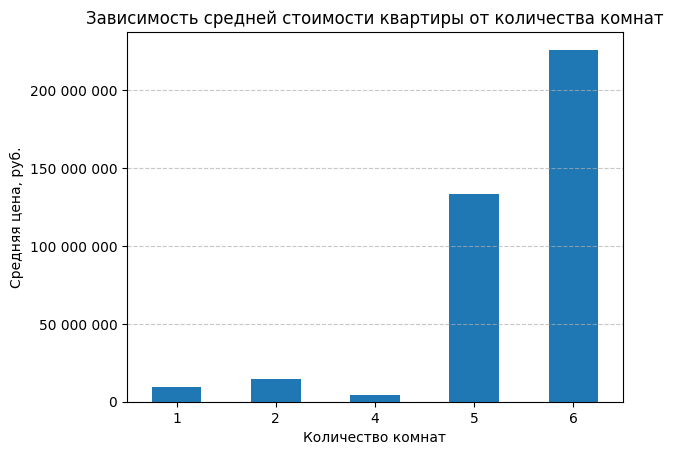

In [45]:
uncorked_data = fixed_df[
    (fixed_df['Комнат'] != 'Нет данных') &
    (fixed_df['Цена, руб.'] != 'Нет данных') &
    (fixed_df['Цена, руб.'] != 'Некорректные данные')
].copy()

uncorked_data['Цена, руб.'] = pd.to_numeric(uncorked_data['Цена, руб.'], errors='coerce')

price_by_rooms = uncorked_data.groupby('Комнат')['Цена, руб.'].mean().sort_index()


price_by_rooms.plot(kind='bar')
plt.title('Зависимость средней стоимости квартиры от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена, руб.')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ticklabel_format(axis='y', style='plain')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'.replace(',', ' ')))
plt.show()

Анализ зависимости средней стоймости квартиры от станции метро

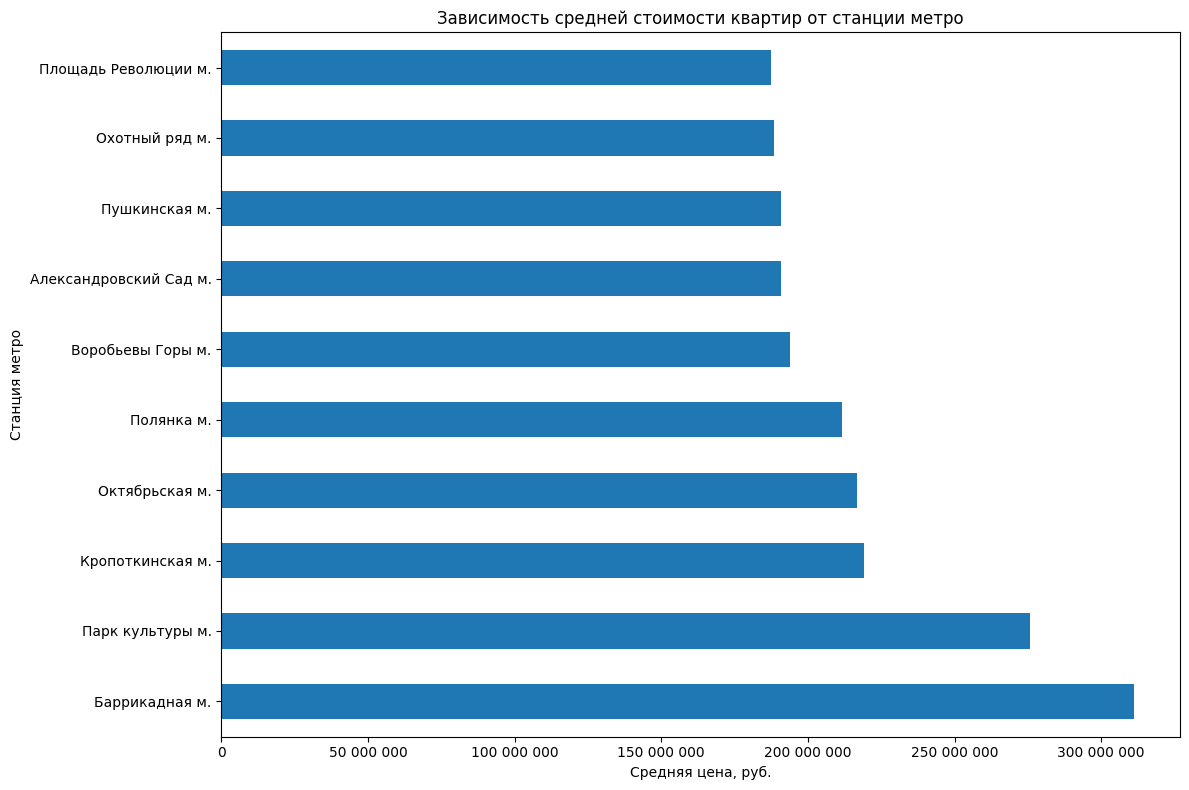

In [46]:
valid_metro_data = fixed_df[
    (fixed_df['Цена, руб.'] != 'Нет данных') &
    (fixed_df['Цена, руб.'] != 'Некорректные данные') &
    (fixed_df['Метро / ЖД станции'] != 'Нет данных')
].copy()

price_by_metro = valid_metro_data.groupby('Метро / ЖД станции')['Цена, руб.'].mean().sort_values(ascending=False)

top_metro = price_by_metro.head(10)

plt.figure(figsize=(12, 8))
top_metro.plot(kind='barh')
plt.title('Зависимость средней стоимости квартир от станции метро')
plt.xlabel('Средняя цена, руб.')
plt.ylabel('Станция метро')

plt.ticklabel_format(axis='x', style='plain')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'.replace(',', ' ')))

plt.tight_layout()
plt.show()

Анализ средней стоимости квартиры от общей площади

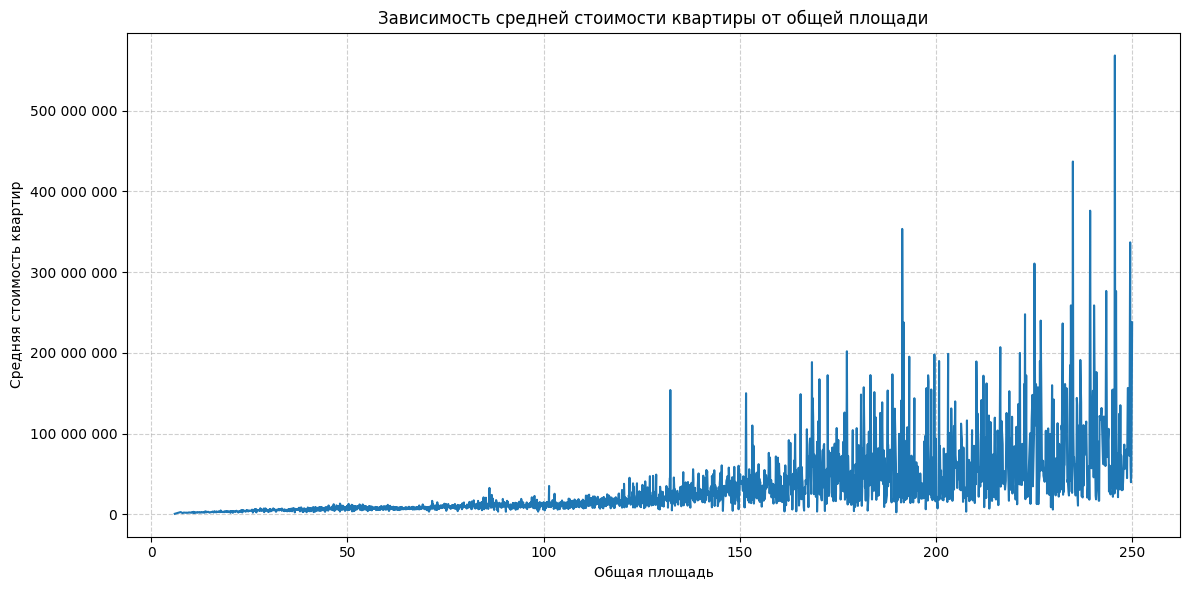

In [40]:
price_square = fixed_df[
    (fixed_df['Общая площадь всех помещений'] != 'Нет данных') &
    (fixed_df['Общая площадь всех помещений'] != 'Некорректные данные') &
    (fixed_df['Цена, руб.'] != 'Нет данных') &
    (fixed_df['Цена, руб.'] != 'Некорректные данные')
].copy()

price_square = price_square[price_square['Общая площадь всех помещений'] <= 250]

price_by_area = (price_square.groupby('Общая площадь всех помещений')['Цена, руб.'].mean().sort_index())

plt.figure(figsize=(12, 6))
price_by_area.plot()

plt.title('Зависимость средней стоимости квартиры от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Средняя стоимость квартир')

plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'.replace(',', ' ')))
plt.tight_layout()
plt.show()

Перевод параметров в числовой формат

In [47]:
def get_floor_ratio(arg):
  if(arg == 'Нет данных' or arg == 'Некорректные данные'):
    return np.nan
  arg = arg.split('/')
  floor_ratio = float(arg[0])/float(arg[1])
  return floor_ratio

def getDistanceFromStationInPFormat(arg):
  if(arg == 'Нет данных' or 'т' in arg):
    return np.nan
  arg = arg[:-1]
  dist = float(arg)
  return dist

def getDistanceFromStationInTFormat(arg):
  if(arg == 'Нет данных' or 'п' in arg):
    return 0
  arg = arg[:-1]
  dist = float(arg)
  return dist

fixed_df['Комнат'] = fixed_df['Комнат'].replace('Нет данных', np.nan)
fixed_df['Комнат'] = fixed_df['Комнат'].astype(pd.Int64Dtype())
fixed_df['Этаж'] = fixed_df['Этаж'].map(get_floor_ratio)
fixed_df.insert(13, 'Раздельный санузел', fixed_df['Санузел'].map(lambda x: 1 if x == 'Р' else 0))
fixed_df.insert(14, 'Совмещенный санузел', fixed_df['Санузел'].map(lambda x: 1 if x == 'С' else 0))

area_num = pd.to_numeric(fixed_df['Общая площадь всех помещений'].replace({"Нет данных": np.nan,"Некорректные данные": np.nan}),errors='coerce').fillna(0)
valid = area_num.copy()
ranks = valid[valid > 1].rank(method='dense').astype(int) + 1
valid.update(ranks)

fixed_df['Общая площадь всех помещений'] = valid.astype(int)

fixed_df['Цена, руб.'] = fixed_df['Цена, руб.'].replace({
    "Нет данных": np.nan,
    "Некорректные данные": np.nan
})

fixed_df['Цена, руб.'] = pd.to_numeric(fixed_df['Цена, руб.'], errors='coerce')

fixed_df['Бонус агента в тыс.'] = fixed_df['Бонус агента в тыс.'].replace("Нет данных", np.nan)

fixed_df.drop(columns=['Дата', 'Кол-во дней в экспозиции', 'Метро / ЖД станции', 'ГРМ', 'Санузел', 'Тип дома', 'Балкон', 'От станции'], inplace=True)

fixed_df.head(50)


/tmp/ipython-input-366661600.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  area_num = pd.to_numeric(fixed_df['Общая площадь всех помещений'].replace({"Нет данных": np.nan,"Некорректные данные": np.nan}),errors='coerce').fillna(0)
/tmp/ipython-input-366661600.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixed_df['Цена, руб.'] = fixed_df['Цена, руб.'].replace({
/tmp/ipython-input-366661600.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old b

,Комнат,Этаж,Общая площадь всех помещений,"Цена, руб.",Бонус агента в тыс.,Раздельный санузел,Совмещенный санузел
0,1,0.945946,1521,19500000.0,NaN,0,0
1,1,0.785714,778,4800000.0,NaN,1,0
2,1,0.500000,842,7990000.0,NaN,0,1
3,1,NaN,691,11200000.0,NaN,1,0
4,1,0.285714,672,6250000.0,NaN,0,1
5,1,0.250000,1017,12700000.0,NaN,0,0
6,1,0.437500,896,6500000.0,NaN,1,0
7,1,0.400000,580,6000000.0,NaN,0,1
8,1,0.500000,847,8900000.0,NaN,0,0
9,1,0.416667,668,5999984.0,NaN,0,0


Корреляция

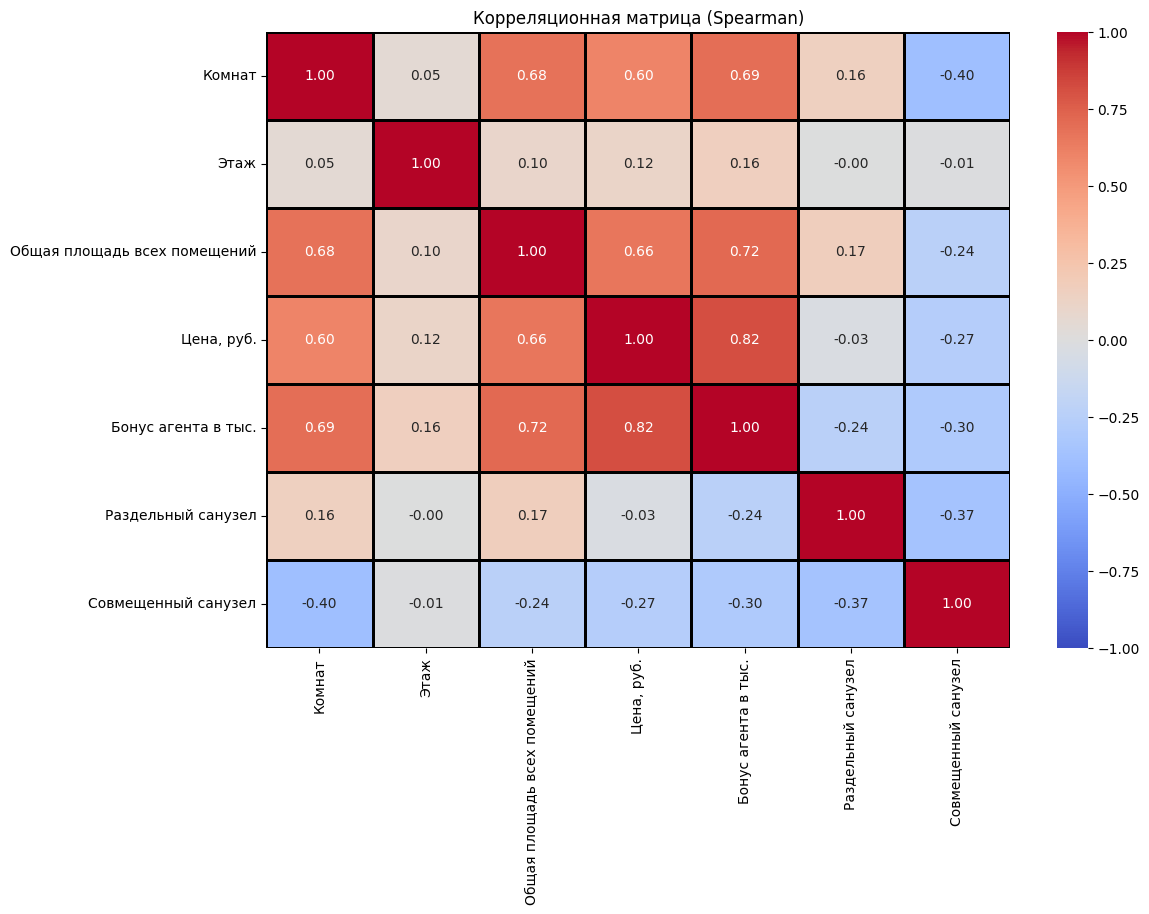

In [48]:
categorical = fixed_df.copy()

corr_matrix = categorical.corr(method='spearman')

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    annot=True,
    fmt=".2f",
    linewidths=1,
    linecolor='black'
)
plt.title("Корреляционная матрица (Spearman)")
plt.show()